# Pràctica: Llei d'Ohm. Efecte Joule

## Objectius

* Aprendre a utilitzar una font d'alimentació de laboratori.
* Identificar el valor nominal d'una resistència amb el codi de colors.
* Distingir entre valor nominal i valor real d'una resistència.
* Comprobar la linialitat de la llei d'Ohm per a una resistència de pel·lícula metàlica.
* Observar la variació quadràtica de l'efecte Joule amb la tensió.
* Observar la producció de calor per efecte Joule.
* Recol·lecció i anàlisi de dades experimentals. Interpretació. Mètode gràfic i mètode de regressió linial.
* Observar el perill d'excedir els valors màxims de dissipació d'una resistència. Reconeixer l'olor tipic del component en aquest cas, que ens pot ajudar a reaccionar correctament en el nostre entorn quotidià.

## Material

* Font d'alimentació regulable 0-20 V 1 A
* Resistència de pel·lícula metàl·lica $100 \Omega, tolerància \pm 5 \%, 1/4 W $
* Multímetre
* Pinzes de cocodril
* Cables de connexió

## Comprovacions

Comprovem que la resistència té un valor nominal 100 𝛺 i una tolerància del 5% llegint la codificació de colors que porta aquesta resistència.

![](img/CorrentContinu/CodiColors.png)

Amb el multímetre configurat com a ohmímetre mesurem el valor real i comprovem qu està dintre del marge de tolerància

In [1]:
tol = 5/100
Rnom = 100
marge = tol*Rnom
Rmin = Rnom - marge
Rmax = Rnom + marge
Rmin, Rmax

(95.0, 105.0)

## Recollida de dades

Amb la font d’alimentació aplicarem diferents tensions i mesurarem la tensió i la intensitat, valors mesurats amb els quals calcularem la resistència i la potència dissipada.

Fins als 5 V podem treballar segurs: teòricament la potència generada és $P = \frac{U^2}{R} =  \frac{5^2}{100} = 0,25 W$, potència que pot dissipar la resistència (1/4 W). Per valors superiors anirem amb compte. A 7 V podem tocar la resistència uns segons i veurem com s'escalfa, està dissipant pràcticament el doble del valor nominal. Per valors superiors no toqueu; sobre els 12-15 V la resistència no pot dissipar la potència generada: comença a emetre un olor característic a cremat i finalment es crema amb flama.

| U [V]      | I [mA] | R [$ \Omega$]     |  P [mW]  |
|    :----:   |    :----:   |    :----:   |    :----:   |
| 1,0  | 10,83  |   |   |
| 2,0  | 20,6  |   |   |
| 3,0  | 31,1  |   |   |
| 4,0  | 41,8  |   |   |
| 5,0  | 52,0  |   |   |
| 7,0  | 72,8  |   |   |
| 10,0  | 105,7  |   |   |
| 12,0  | 128,3  |   |   |
| 15,0  | 163,7  |   |   |



## Anàlisi de les dades

In [2]:
U = [1.0,2.0,3.0,4.0,5.0,7.0,10.0,12.0,15.0]
I = [10.83,20.6,31.1,41.8,52.0,72.8,105.7,128.3,163.7]
R = []                        #Create empty list
P = []                        #Create empty list
print ("U [V]","I [mA]","R [Ω]","P [mW]")
for i in range(0, len(U)):
     P.append(U[i]*I[i])
     R.append(U[i]/I[i]*1000)
     print(U[i],I[i],round(R[i]),round(P[i]))

U [V] I [mA] R [Ω] P [mW]
1.0 10.83 92 11
2.0 20.6 97 41
3.0 31.1 96 93
4.0 41.8 96 167
5.0 52.0 96 260
7.0 72.8 96 510
10.0 105.7 95 1057
12.0 128.3 94 1540
15.0 163.7 92 2456


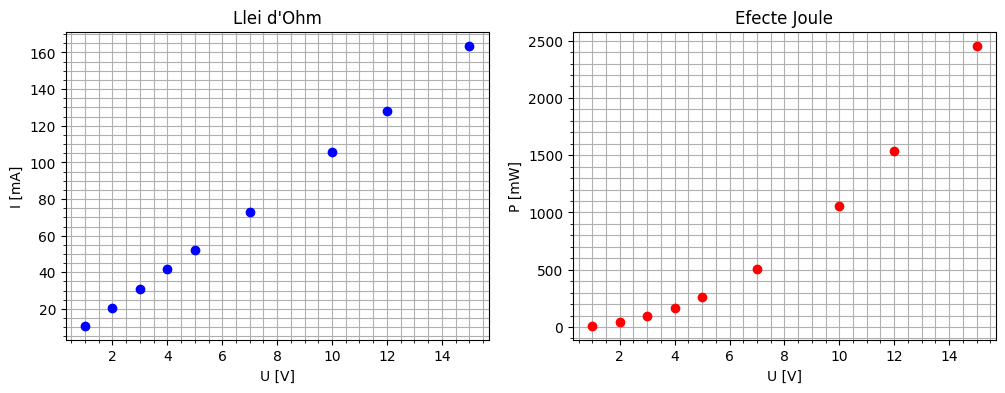

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(U, I, 'bo')
plt.xlabel('U [V]')
plt.ylabel('I [mA]')
plt.title("Llei d'Ohm")
plt.grid(which = "both")
plt.minorticks_on()


plt.subplot(122)
plt.plot(U, P, 'ro')
plt.xlabel('U [V]')
plt.ylabel('P [mW]')
plt.title("Efecte Joule")
plt.grid(which = "both")
plt.minorticks_on()
plt.show()


Fixeu-vos en la dependència linial a I(U) ila dependència quadràtica de P(U)

## Conclusions

Podem fer una estimació de R amb el pendent d'una recta que ajusti els punts experimentals a I(U)

Un mètode molt utilitzat és la regressió linial, que trobareu a qualsevol calculadora científica

In [4]:
from scipy.stats import linregress

m, b, r, *_ = linregress(U,I) 
m,b,r, r**2

(10.874164677804297,
 -1.6384128878281672,
 0.9996961450433066,
 0.9993923824144479)

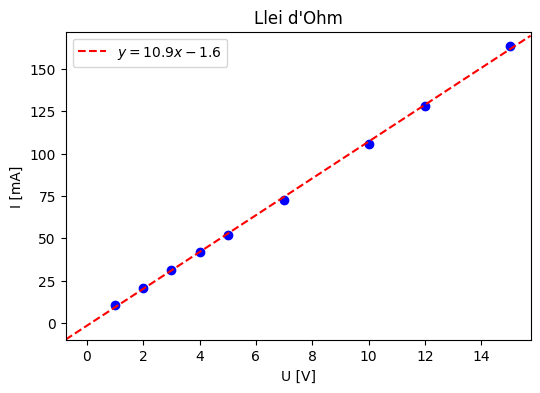

In [5]:
plt.figure(figsize=(6, 4))
plt.plot(U, I, 'bo')
plt.axline(xy1=(0, b), slope=m, label=f'$y = {m:.1f}x {b:+.1f}$', linestyle='--', color='r')
plt.xlabel('U [V]')
plt.ylabel('I [mA]')
plt.title("Llei d'Ohm")
plt.legend()
plt.show()


In [6]:
Rexp = 1/m*1000
Rexp

91.96108663326949

Es a dir, podem estimar la resistència en $R \simeq 92 \Omega$